## Preparing data

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [21]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [22]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [23]:
train_labels[0]

1

In [24]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
train_data.shape, x_train.shape

((25000,), (25000, 10000))

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train.shape, y_train[0]

((25000,), 1.0)

## Building network

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

In [30]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
partial_x_train.shape, partial_y_train.shape

((15000, 10000), (15000,))

In [32]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [33]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5973 - acc: 0.7625 - val_loss: 0.4898 - val_acc: 0.8454
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4072 - acc: 0.8737 - val_loss: 0.3724 - val_acc: 0.8598
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2983 - acc: 0.8996 - val_loss: 0.3121 - val_acc: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2378 - acc: 0.9203 - val_loss: 0.2828 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1961 - acc: 0.9357 - val_loss: 0.2763 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1678 - acc: 0.9455 - val_loss: 0.2792 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1451 - acc: 0.9542 - val_loss: 0.2831 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1240 - acc: 

## Visualize

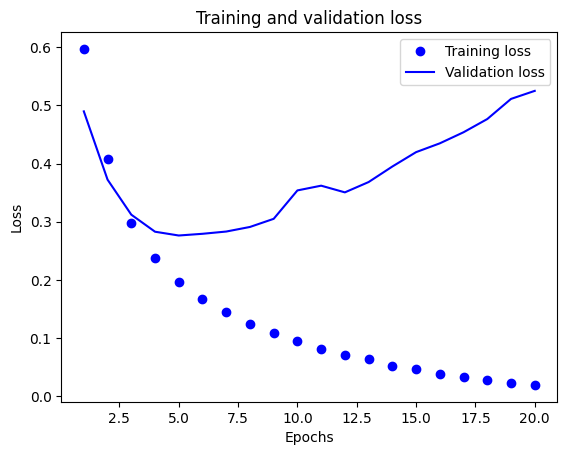

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

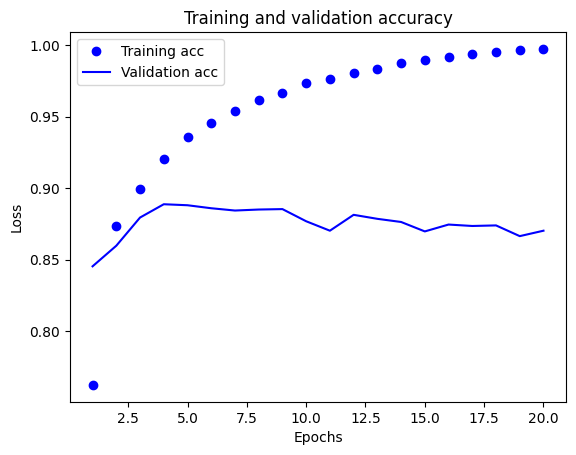

In [39]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## With epochs = 4

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2023-09-28 18:00:30.681871: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 1s 6ms/step - loss: 0.4693 - accuracy: 0.8095
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2813 - accuracy: 0.9004
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.9217
Epoch 4/4
 65/782 [=>............................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8861 

2023-09-28 18:00:33.362846: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 674us/step - loss: 0.2903 - accuracy: 0.8833


In [41]:
results

[0.29029732942581177, 0.8832799792289734]

In [ ]:
test_pred = model.predict(x_test)
test_pred.shape

235/782 [========>.....................] - ETA: 0s

2023-09-28 18:02:39.868227: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 659us/step


(25000, 1)